In [38]:
import os
import subprocess
import json
import string
import pytz
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd
import numpy as np

from datetime import datetime
from nltk.corpus import stopwords
from nltk.tokenize import TweetTokenizer
from collections import defaultdict
from collections import Counter



_datadir = r'C:\Me\Study\Conestoga\II\PROG8460\Final\twitter_stream_2019_09_30\30'

_totalrecords = 0
_totalcreated = 0
_totaldeleted = 0

_mindate = datetime.max.replace(tzinfo=pytz.UTC)
_maxdate = datetime.min.replace(tzinfo=pytz.UTC)

_hastagpertweet = defaultdict(int)
_usermentions = Counter()
_tweettokens = Counter()

tokenizer = TweetTokenizer()
_punctuations = list(string.punctuation)
_extratokens = ["rt", "via", "...",".."]

_stopwords = stopwords.words("english") + _punctuations + _extratokens


In [5]:
def bz2_file_process(path):
    if not os.path.isfile(path): return
    _cdir = os.getcwd()
    _cpath = os.path.dirname(path)
    _filename = os.path.basename(path)
    
    _ffile = _filename[0:len(_filename) - 4]
    _ffilepath = os.path.join(_cpath, _ffile)
    if _filename.endswith(".bz2") and not os.path.isfile(_ffilepath):
        os.chdir(_cpath)
        system = subprocess.Popen([r"C:\Program Files\7-Zip\7z.exe", "e", _filename])
        os.chdir(_cdir)
        return(system.communicate())

In [6]:
def process_dir():
    '''
     Thid function get all dir from parent dir and pass that path to bz2_file_process for extraction
    '''
    os.chdir(_datadir)
    hours = os.listdir(".")
    for hour in hours:
        _dest = os.path.join(_datadir, hour)
        _files = os.listdir(_dest)
        for _f in _files:
            bz2_file_process(os.path.join(_dest,_f))



In [7]:
process_dir()

In [9]:
def gethashtags(tweet):
    entities = tweet.get('entities',{})
    _hashtags = entities.get("hashtags", {})
    return [_hash['text'].lower() for _hash in _hashtags]

In [18]:
def gettokens(_text, tokenizer=TweetTokenizer(), stopwords=[]):
    _text = _text['text'].lower()
    _tokens = tokenizer.tokenize(_text)
    return [token for token in _tokens if token not in stopwords and not token.isdigit() and len(token) > 1]
    

In [11]:
def getusermentions(tweet):
    entities = tweet.get('entities',{})
    _users = entities.get("user_mentions", {})
    return [_user['screen_name'].lower() for _user in _users]
    

In [39]:
def start():
    os.chdir(_datadir)
    hours = os.listdir(".")
    for hour in hours:
        path = os.path.join(_datadir, hour)
        os.chdir(path)
        _files = os.listdir(path)
        for file in _files:
            if file.endswith(".json"):
                with open(file, "r") as f:
                    process_tweet(f)

In [40]:
start()

In [72]:
print("Total no. of tweets : ",_totalrecords)
print("Total created tweets : ",_totalcreated)
print("Total deleted tweets : ",_totaldeleted)

print("---------------------------------------")
print()
print("Earliest: ", _mindate)
print("Latest: ", _maxdate)

print("---------------------------------------")
print()

print("Frequency distribution table for the number of hashtags contained in each tweet.")

hastagpertweet = pd.DataFrame(sorted(_hastagpertweet.items()),
                             columns=['No of hashtag', 'Count'])
hastagpertweet


Total no. of tweets :  4928217
Total created tweets :  3585053
Total deleted tweets :  1343164
---------------------------------------

Earliest:  2019-09-30 06:29:00+00:00
Latest:  2019-10-01 05:59:59+00:00
---------------------------------------

Frequency distribution table for the number of hashtags contained in each tweet.


,No of hashtag,Count
0,0,3091187
1,1,255473
2,2,105684
3,3,55786
4,4,32137
5,5,17976
6,6,10557
7,7,7851
8,8,3326
9,9,2103


In [73]:
print("Frequency distribution table for the users mentioned in each tweet")

user_mentioned = pd.DataFrame(_usermentions.most_common(30),
                             columns=['User', 'Count'])
user_mentioned


Frequency distribution table for the users mentioned in each tweet


,User,Count
0,bts_twt,24359
1,realdonaldtrump,20047
2,weareoneexo,6403
3,bts_bighit,4485
4,youtube,4138
5,superm,2744
6,b_hundred_hyun,2484
7,stranger_things,2261
8,m78akh,2064
9,charliekirk11,1868


In [74]:

print("Frequency distribution table for the words used in the text of each tweet")

tweettokens = pd.DataFrame(_tweettokens.most_common(30),
                             columns=['Word', 'Count'])
tweettokens


Frequency distribution table for the words used in the text of each tweet


,Word,Count
0,de,283328
1,que,208606
2,la,139592
3,en,93449
4,el,91895
5,se,65509
6,eu,61209
7,like,56944
8,un,54856
9,por,47902


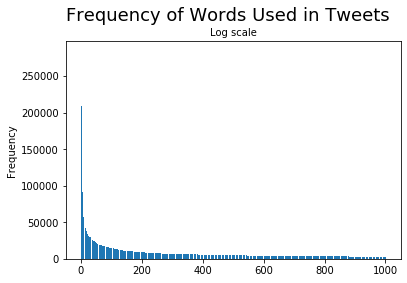

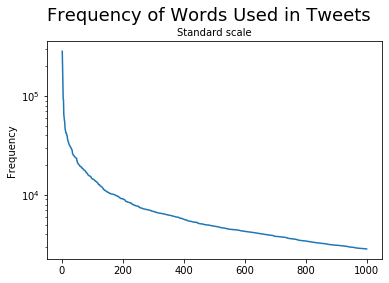

In [43]:
os.chdir(_datadir)

y = [count for token, count in _tweettokens.most_common(1000)]
x = range(1, len(y) + 1)

plt.bar(x, y)
plt.title("Log scale", fontsize = 10)
plt.suptitle("Frequency of Words Used in Tweets", fontsize = 18, y = 1)
plt.ylabel("Frequency")
plt.savefig("standardscale.png", bbox_inches="tight")
plt.show()

plt.semilogy(x, y)
plt.title("Standard scale", fontsize = 10)
plt.suptitle("Frequency of Words Used in Tweets", fontsize = 18, y = 1)
plt.ylabel("Frequency")
plt.savefig("logScale.png", bbox_inches="tight")
plt.show()

In [45]:
_commonwords = set([token for token, count in _tweettokens.most_common(30)])

print(_commonwords)

{'con', 'si', 'من', 'los', 'para', 'es', 'time', 'por', 'one', 'te', 'eu', 'en', 'del', 'ไม', 'el', 'na', 'de', 'não', 'lo', 'le', 'la', 'un', 'get', 'que', 'se', 'love', 'في', 'da', 'like', 'people'}


In [80]:
_tweets = []
_tweet_created = []
def gettweet_most_comon_words(json_file):
    global _tweets
    global _tweet_created
    for record in json_file:
        tweet = json.loads(record)
        if "created_at" in tweet:
            _tokens = gettokens(tweet, tokenizer, _stopwords)
            for t in _commonwords:
                if t in _tokens:
                    _tweets.append(tweet["text"])
                    _date = tweet.get('created_at')
                    _dobj = datetime.strptime(_date, "%a %b %d %H:%M:%S %z %Y")
                    _tweet_created.append(_dobj)

In [81]:
def start_a():
    os.chdir(_datadir)
    hours = os.listdir(".")
    for hour in hours:
        path = os.path.join(_datadir, hour)
        os.chdir(path)
        _files = os.listdir(path)
        for file in _files:
            if file.endswith(".json"):
                with open(file, "r") as f:
                    gettweet_most_comon_words(f)
                    
                    

In [82]:
start_a()

In [83]:
_tweetsdf = {'tweet':_tweets, 'created':_tweet_created}

df = pd.DataFrame(_tweetsdf)

C:\Users\User\Anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:1172: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  "will drop timezone information.", UserWarning)


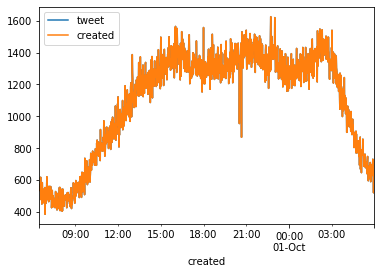

In [93]:
p = df.resample('1Min', on='created').count().plot()
fig = p.get_figure()
fig.savefig(r"C:\Me\Study\Conestoga\II\PROG8460\Final\twitter_stream_2019_09_30\30\resample.png")